In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

##### Read the data

In [13]:
df = pd.read_csv('../experiments/data-processed.csv')
df.shape

(5204, 3)

In [4]:
df2 = df['feature'].str.get_dummies(sep=',')

In [5]:
df2['acc'] = df['acc']

In [7]:
df2.shape

(5204, 76)

##### Separate the data

In [8]:
# split data into X and y
array = df2.values
X = array[:,0:75]
Y = array[:,75]

In [9]:
tsne = TSNE(n_components=2, 
            random_state=0,
            perplexity=30,
            learning_rate=200,
            n_iter=1000)

In [10]:
tsne_obj = tsne.fit_transform(X)

In [11]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                         'acc':Y})

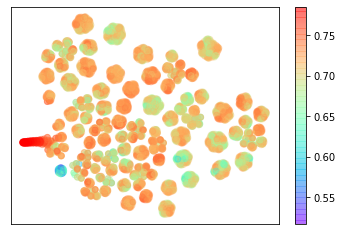

In [12]:
# plot the result
vis_x = tsne_obj[:, 0]
vis_y = tsne_obj[:, 1]
#classes = ['0.809', '0.803', '0.797', '0.791', '0.785']
scatter = plt.scatter(vis_x, vis_y, c=Y,
                      cmap='rainbow', 
                      alpha=0.35)
plt.colorbar(scatter)
plt.xticks([])
plt.yticks([])
plt.grid()
plt.savefig('../reports/kmeans.png', bbox_inches='tight', dpi=800)
plt.show()